In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df_churn = pd.read_csv('Telecom_Churn/churn_data.csv')
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_customer = pd.read_csv('Telecom_Churn/customer_data.csv')
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
df_internet = pd.read_csv('Telecom_Churn/internet_data.csv')
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### merging dataframes

In [5]:
df_1 = pd.merge(df_churn,df_customer,how='inner',on='customerID')
telecom = pd.merge(df_1,df_internet,how='inner',on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


#### Data cleaning

In [6]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [10]:
telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']]

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,No,Yes,No,Yes,No
1,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No
3,No,No,No,No,No
4,Yes,Yes,Yes,No,No
...,...,...,...,...,...
7038,Yes,Yes,No,Yes,Yes
7039,Yes,Yes,No,Yes,Yes
7040,No,Yes,No,Yes,Yes
7041,Yes,Yes,Yes,Yes,No


In [11]:
telecom.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [12]:
telecom.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [13]:
telecom.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
telecom.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']].head()

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,No,Yes,No,Yes,No
1,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No
3,No,No,No,No,No
4,Yes,Yes,Yes,No,No


In [16]:
#convert yes no to 1 0
telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']] = telecom[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [17]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [18]:
#for categirical variable create dummy variables #one hot encoded
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

#add to original set

telecom = pd.concat([telecom,dummy1],axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [19]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [20]:
telecom.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [21]:
m1 = pd.get_dummies(telecom[['MultipleLines']],drop_first=True)
m11 = m1.drop(['MultipleLines_No phone service'],1)
telecom = pd.concat([telecom,m11],axis=1)

In [22]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,1,0,0,0,1,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,0,0,0,0,1,1,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,1,0,0,0,0,1,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,0,0,0,1,0,0,1,0,0


In [23]:
telecom.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [24]:
ol1 = pd.get_dummies(telecom[['OnlineSecurity']],drop_first=True)
ol11 = ol1.drop(['OnlineSecurity_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [25]:
telecom.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [26]:
ol1 = pd.get_dummies(telecom[['OnlineBackup']],drop_first=True)
ol11 = ol1.drop(['OnlineBackup_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,1,0,0,0,0,0,0,1
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,0,1,1,0,0,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,1,1,0,0,0,1,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,0,1,0,0,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,1,0,0,1,0,0,0,0


In [28]:
ol1 = pd.get_dummies(telecom[['DeviceProtection']],drop_first=True)
ol11 = ol1.drop(['DeviceProtection_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [29]:
ol1 = pd.get_dummies(telecom[['TechSupport']],drop_first=True)
ol11 = ol1.drop(['TechSupport_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [30]:
ol1 = pd.get_dummies(telecom[['StreamingTV']],drop_first=True)
ol11 = ol1.drop(['StreamingTV_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [31]:
ol1 = pd.get_dummies(telecom[['StreamingMovies']],drop_first=True)
ol11 = ol1.drop(['StreamingMovies_No internet service'],1)
telecom = pd.concat([telecom,ol11],axis=1)

In [32]:
telecom.value_counts()

customerID  tenure  PhoneService  Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn  gender  SeniorCitizen  Partner  Dependents  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check  gender_Male  InternetService_Fiber optic  InternetService_No  MultipleLines_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes
9995-HOTOH  63      0             Two year        0                 Electronic check           59.00           3707.6        0      Male    0              1        1           No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes            

In [33]:
ol1 = pd.get_dummies(telecom[['Contract']],drop_first=True)
telecom = pd.concat([telecom,ol11],axis=1)

In [34]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,0,1,0,1,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,1,1,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,0,1,1,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,0,0,0,0,0,0,0,0


In [35]:
telecom.drop(['Contract','PaymentMethod','gender','InternetService','MultipleLines','Contract','StreamingMovies',
              'StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity'],inplace=True,axis=1)

In [36]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [38]:
telecom.TotalCharges[telecom['TotalCharges']==0]

Series([], Name: TotalCharges, dtype: object)

In [39]:
telecom.TotalCharges = telecom.TotalCharges.replace(' ',0)

In [40]:
telecom.TotalCharges[telecom.TotalCharges==' ']

Series([], Name: TotalCharges, dtype: object)

In [41]:
telecom.TotalCharges.iloc[488]

0

In [42]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [43]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [44]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'StreamingMovies_Yes'],
      dtype='object')

### Ourliers and data cleaning

In [45]:
telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']].describe(percentiles=[.25,.5,.75,.90,.95])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
max,72.000000,118.750000,1.000000,8684.800000


In [46]:
telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']].describe(percentiles=[.25,.5,.75,.90,.95])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
max,72.000000,118.750000,1.000000,8684.800000


In [47]:
telecom.isna().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_Yes                        0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV

In [48]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_Yes                        0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV

### Test and Train

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#take ecerything exept churn and customer id for X
X =  telecom.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
#take ecerything exept churn and customer id for X
y =  telecom[['Churn']]
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [52]:
##splitting data into Test and Train

X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=.7 )

### Feature Scaling : assessing one feature over other, faster gredient decent

In [53]:
from sklearn.preprocessing import StandardScaler

#StandardScaler = X-mean/sigma

In [54]:
scaler=StandardScaler()

In [55]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [56]:
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,StreamingMovies_Yes
2047,-1.201707,1,1,0.426844,-0.916055,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,1
6082,1.077838,1,0,1.211468,1.666045,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,1
2289,1.607019,1,0,1.421694,2.346255,0,1,1,0,1,...,1,0,1,1,0,1,1,1,1,1
1495,0.792895,1,0,1.113804,1.202849,0,1,1,0,0,...,1,0,1,1,1,1,0,0,1,1
2704,0.833601,1,0,-0.129345,0.451999,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1


In [57]:
## checking churn rate - how much is imbalance

churn  = (sum(telecom.Churn)/len(telecom.Churn.index))*100
churn

26.536987079369588

### Building first model

#### looking at correlations

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

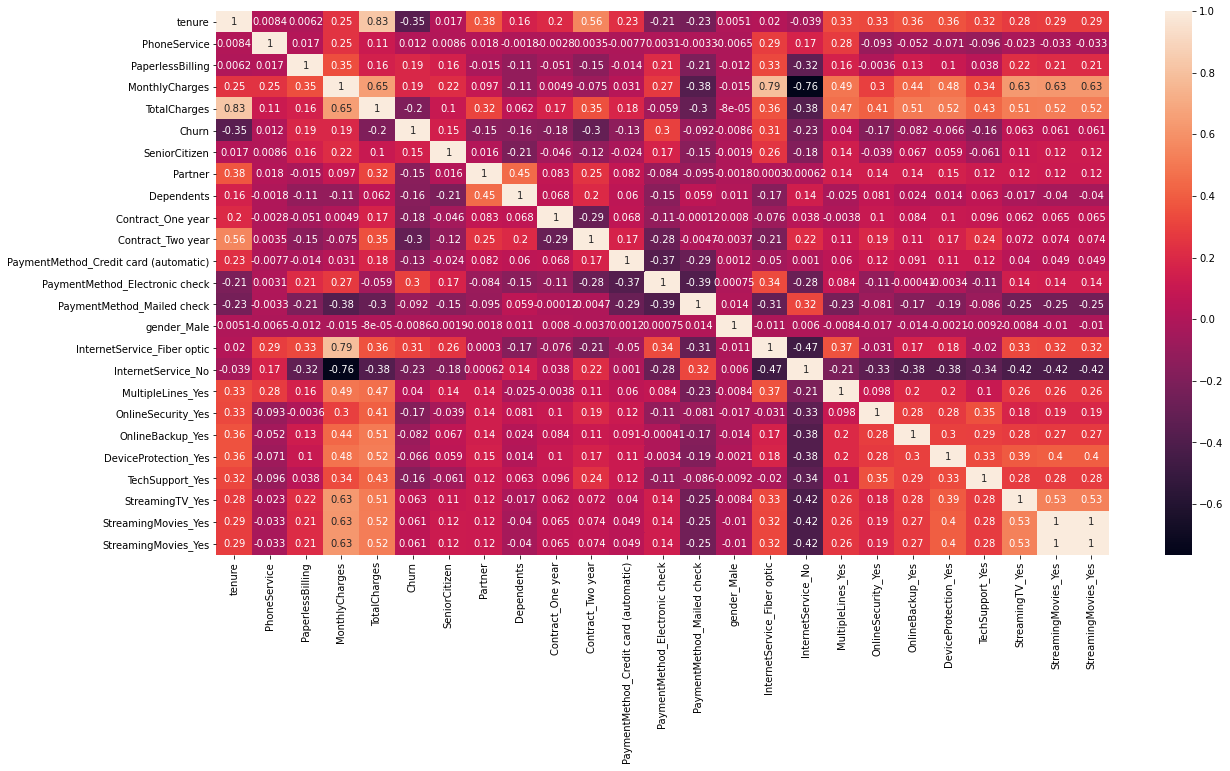

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [60]:
X_test.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'StreamingMovies_Yes'],
      dtype='object')

#### Running first traing model

In [61]:
import statsmodels.api as sm

In [62]:
logm1 = sm.GLM(Y_train, (sm.add_constant(X_train)), family=sm.families.Binomial()) #Generalized Linear Models

In [63]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.6
Date:                Sun, 30 May 2021   Deviance:                       4079.3
Time:                        07:19:01   Pearson chi2:                 5.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7138      1.517     -1.789      0.074      -5.688       0.260
tenure                                   -1.4847      0.179     -8.313      0.000      -1.835      -1.135
PhoneService                              0.0749      0.778      0.096      0.923      -1.450       1.600
PaperlessBilling                          0.4147      0.089      4.644      0.000       0.240       0.590
MonthlyCharges                           -1.3288      1.150     -1.155      0.248      -3.583       0.926
TotalCharges                              0.7742      0.187      4.137      0.000       0.407       1.141
SeniorCitizen                             0.2396      0.102      2.358      0.018       0.040       0.439
Partner                                   0.0104      0.093      0.112      0.911      -0.171       0.192
Dependents                               -0.2063      0.108     -1.909      0.056      -0.418       0.006
Contract_One year                        -0.6778      0.130     -5.222      0.000      -0.932      -0.423
Contract_Two year                        -1.3270      0.207     -6.403      0.000      -1.733      -0.921
PaymentMethod_Credit card (automatic)    -0.1612      0.137     -1.178      0.239      -0.430       0.107
PaymentMethod_Electronic check            0.3344      0.113      2.967      0.003       0.114       0.555
PaymentMethod_Mailed check               -0.0458      0.137     -0.333      0.739      -0.315       0.223
gender_Male                              -0.0391      0.078     -0.505      0.614      -0.191       0.113
InternetService_Fiber optic               1.8832      0.957      1.968      0.049       0.008       3.758
InternetService_No                       -1.6335      0.967     -1.689      0.091      -3.529       0.262
MultipleLines_Yes                         0.4218      0.213      1.980      0.048       0.004       0.839
OnlineSecurity_Yes                       -0.1731      0.214     -0.810      0.418      -0.592       0.246
OnlineBackup_Yes                          0.0809      0.212      0.382      0.703      -0.334       0.496
DeviceProtection_Yes                      0.1428      0.210      0.680      0.496      -0.269       0.554
TechSupport_Yes                          -0.1364      0.217     -0.629      0.530      -0.562       0.289
StreamingTV_Yes                           0.6242      0.391      1.594      0.111      -0.143       1.392
StreamingMovies_Yes                       0.2895      0.196      1.476      0.140      -0.095       0.674
StreamingMovies_Yes                       0.2895      0.196      1.476      0.140      -0.095       0.674
=========================================================================================================
"""

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### RFE = Recursive feature elimination

In [65]:
from sklearn.feature_selection import RFE #RFE = Recursive feature elimination
rfe = RFE(logreg,15) #running RFE with 13 varibale output
rfe = rfe.fit(X_train,Y_train)

In [66]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False])

In [67]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', False, 2),
 ('Partner', False, 10),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 8),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('StreamingMovies_Yes', False, 4)]

 RFE assigns ranks to the different variables based on their significance. While 1 means that the variable should be selected, a rank > 1 tells you that the variable is insignificant. The ranking given to 'gender_Male' by RFE is
9 
which is the highest and hence, it is the most insignificant variable present in the RFE output.

In [68]:
col = X_train.columns[rfe.support_] #feaures supported by RFE
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_] #features rejected by RFE

Index(['SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

### Assessing model with stats model

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family=sm.families.Binomial())
result =  logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.6
Date:                Sun, 30 May 2021   Deviance:                       4093.3
Time:                        07:19:03   Pearson chi2:                 5.77e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.0054      0.478     -4.197      0.000      -2.942      -1.069
tenure                            -1.4935      0.175     -8.513      0.000      -1.837      -1.150
PhoneService                      -0.3567      0.290     -1.230      0.219      -0.925       0.212
PaperlessBilling                   0.4263      0.089      4.798      0.000       0.252       0.600
MonthlyCharges                    -0.7480      0.381     -1.965      0.049      -1.494      -0.002
TotalCharges                       0.7968      0.186      4.282      0.000       0.432       1.162
Contract_One year                 -0.7105      0.129     -5.508      0.000      -0.963      -0.458
Contract_Two year                 -1.3904      0.206     -6.763      0.000      -1.793      -0.987
PaymentMethod_Electronic check     0.4203      0.082      5.111      0.000       0.259       0.582
InternetService_Fiber optic        1.4424      0.331      4.362      0.000       0.794       2.091
InternetService_No                -1.1688      0.373     -3.130      0.002      -1.901      -0.437
MultipleLines_Yes                  0.3341      0.113      2.963      0.003       0.113       0.555
OnlineSecurity_Yes                -0.2875      0.118     -2.438      0.015      -0.519      -0.056
TechSupport_Yes                   -0.2473      0.122     -2.026      0.043      -0.487      -0.008
StreamingTV_Yes                    0.4267      0.161      2.657      0.008       0.112       0.741
StreamingMovies_Yes                0.1991      0.081      2.469      0.014       0.041       0.357
StreamingMovies_Yes                0.1991      0.081      2.469      0.014       0.041       0.357
==================================================================================================
"""

In [71]:
## getting predicted values on the training set

Y_train_pred = result.predict(X_train_sm) # returns probability of getting a 1
Y_train_pred[:10]

2047    0.442141
6082    0.370815
2289    0.036266
1495    0.177452
2704    0.030402
5878    0.103556
5052    0.245074
5527    0.118787
2927    0.717441
5753    0.281897
dtype: float64

### Creating dataframe with actual churn and predicted probability

In [72]:
Y_train_pred.shape

(4930,)

In [73]:
Y_train_values = [x[0] for x in Y_train.values[:]]

In [74]:
Y_train_pred_final =  pd.DataFrame({'Churn':Y_train_values,'Churn_Pred':Y_train_pred})
Y_train_pred_final['Cust_Id']=Y_train.index
Y_train_pred_final.head()

,Churn,Churn_Pred,Cust_Id
2047,0,0.442141,2047
6082,1,0.370815,6082
2289,0,0.036266,2289
1495,0,0.177452,1495
2704,0,0.030402,2704


In [75]:
Y_train_pred_final[Y_train_pred_final.Cust_Id==879]

,Churn,Churn_Pred,Cust_Id


### Creating new column predicted with 1 if churn probaility>.5 else 0

In [76]:

Y_train_pred_final['Predicted'] = Y_train_pred_final.Churn_Pred.map(lambda x:1 if x>.5 else 0)

Y_train_pred_final.head()

,Churn,Churn_Pred,Cust_Id,Predicted
2047,0,0.442141,2047,0
6082,1,0.370815,6082,0
2289,0,0.036266,2289,0
1495,0,0.177452,1495,0
2704,0,0.030402,2704,0


#### Confison metrix

In [77]:
from sklearn import metrics

confusion = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final.Predicted)
confusion

array([[3256,  381],
       [ 592,  701]], dtype=int64)

In [78]:
metrics.accuracy_score(Y_train_pred_final.Churn, Y_train_pred_final.Predicted)

0.8026369168356998

### Manual Fetures Elimination using VIF (How well an independent variable is explained by other independent variables) - High VIF reccomended

In [79]:
Y_train_pred_final.corr()

,Churn,Churn_Pred,Cust_Id,Predicted
Churn,1.000000,0.550681,0.016818,0.464849
Churn_Pred,0.550681,1.000000,0.001904,0.830902
Cust_Id,0.016818,0.001904,1.000000,0.005851
Predicted,0.464849,0.830902,0.005851,1.000000


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
X_train[col].columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [82]:
X_train[col].shape[1]

16

In [83]:
vif = pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor( X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,StreamingMovies_Yes,inf
15,StreamingMovies_Yes,inf
3,MonthlyCharges,14.28
4,TotalCharges,10.18
1,PhoneService,8.58
0,tenure,6.93
8,InternetService_Fiber optic,6.87
9,InternetService_No,6.55
6,Contract_Two year,3.37
13,StreamingTV_Yes,2.91


In [84]:
list(vif[(vif.VIF>5)].Features)

['StreamingMovies_Yes',
 'StreamingMovies_Yes',
 'MonthlyCharges',
 'TotalCharges',
 'PhoneService',
 'tenure',
 'InternetService_Fiber optic',
 'InternetService_No']

In [85]:
X_train.drop(list(vif[(vif.VIF>5)].Features),axis=1,inplace=True)

In [86]:
X_train.columns

Index(['PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [87]:
X_train_sm =  sm.add_constant(X_train)
logm3 = sm.GLM(Y_train,X_train_sm,family=sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2196.0
Date:                Sun, 30 May 2021   Deviance:                       4392.1
Time:                        07:19:04   Pearson chi2:                 5.00e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9435      0.126     -7.459      0.000      -1.191      -0.696
PaperlessBilling                          0.5749      0.084      6.850      0.000       0.410       0.739
SeniorCitizen                             0.2963      0.097      3.058      0.002       0.106       0.486
Partner                                  -0.1788      0.087     -2.059      0.039      -0.349      -0.009
Dependents                               -0.2926      0.104     -2.824      0.005      -0.496      -0.090
Contract_One year                        -1.4474      0.115    -12.634      0.000      -1.672      -1.223
Contract_Two year                        -2.6003      0.184    -14.123      0.000      -2.961      -2.239
PaymentMethod_Credit card (automatic)    -0.1480      0.132     -1.123      0.261      -0.406       0.110
PaymentMethod_Electronic check            0.6246      0.107      5.835      0.000       0.415       0.834
PaymentMethod_Mailed check                0.0068      0.127      0.053      0.957      -0.242       0.255
gender_Male                              -0.0601      0.074     -0.809      0.419      -0.206       0.085
MultipleLines_Yes                         0.1633      0.081      2.009      0.044       0.004       0.323
OnlineSecurity_Yes                       -0.4178      0.097     -4.326      0.000      -0.607      -0.229
OnlineBackup_Yes                         -0.1789      0.087     -2.068      0.039      -0.348      -0.009
DeviceProtection_Yes                      0.0201      0.089      0.225      0.822      -0.155       0.195
TechSupport_Yes                          -0.3282      0.098     -3.334      0.001      -0.521      -0.135
StreamingTV_Yes                           0.4363      0.087      5.038      0.000       0.267       0.606
=========================================================================================================
"""

In [88]:
Y_train_pred = result.predict(X_train_sm).values.reshape(-1)[0:10]
Y_train_pred

array([0.55834812, 0.48075273, 0.01575433, 0.13844567, 0.04787117,
       0.0798673 , 0.29538927, 0.12125163, 0.54881254, 0.35968285])

In [89]:
Y_train_pred_final.drop('Predicted',inplace=True,axis=1)

In [90]:
Y_train_pred_final.head()

,Churn,Churn_Pred,Cust_Id
2047,0,0.442141,2047
6082,1,0.370815,6082
2289,0,0.036266,2289
1495,0,0.177452,1495
2704,0,0.030402,2704


In [97]:
Y_train_pred_final.drop('Churn_prob',inplace=True,axis=1)
Y_train_pred_final['Churn_prob'] = Y_train_pred_final.Churn_Pred.map(lambda x:1 if x>.3 else 0)

Y_train_pred_final.head()

,Churn,Churn_Pred,Cust_Id,Churn_prob
2047,0,0.442141,2047,1
6082,1,0.370815,6082,1
2289,0,0.036266,2289,0
1495,0,0.177452,1495,0
2704,0,0.030402,2704,0


In [98]:
metrics.accuracy_score(Y_train_pred_final.Churn, Y_train_pred_final.Churn_prob)

0.7643002028397566

In [99]:
confusion_matrix = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final.Churn_prob)
confusion_matrix

array([[2785,  852],
       [ 310,  983]], dtype=int64)

In [100]:
2785/3437

0.8102996799534478

### Matrix beyond simple accuracy

In [94]:
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
print('TP',TP)
print('FP',FP)
print('FN',FN)
print('TN',TN)

TP 701
FP 381
FN 592
TN 3256


### ROC Curve - ROC curve shows the trade-off between True Positive Rate and False Positive Rate

In [101]:
#presion and recall

from sklearn.metrics import precision_score,recall_score

In [102]:
?precision_score

In [103]:
p=150/250
r=150/200
f1 = (2*p*r)/(p+r)
f1


0.6666666666666665

In [104]:
1653/2110

0.7834123222748816

In [106]:
359/582

0.6168384879725086

In [107]:
1050/(1050+400)

0.7241379310344828

In [108]:
1050/(1050+350)

0.75

In [109]:
df_loan = pd.read_csv('loan.csv')

In [110]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [113]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [118]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [129]:
df_loan.iloc[0:50,40:60]

,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m
0,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
1,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
3,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,Jun-16,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
5,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
6,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
7,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
8,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
9,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN
